<a href="https://colab.research.google.com/github/aadithyan69/Projects/blob/main/Project_Mobile_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/drive/MyDrive/Mobile Price Prediction.csv')
df

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)/ 3(1800)/ 7(2600)/ 8(900)/ 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0/ A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0/ A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)/ accelerometer/ pr...,Removable Li-Po 4080 mAh battery,Black/ White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion 2000 mAh battery,Black/ White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,NA,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe/ Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0/ A2DP/ LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity/ compass,Removable Li-Po 4020 mAh battery,Black/ Gold,230,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,ZTE,F600,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 800 mAh battery,Black,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f600.jpg
8624,ZTE,F103,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 1000 mAh battery,Black/ Silver,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f103.jpg
8625,ZTE,F101,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 1000 mAh battery,White/ Red/ Green,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f101.jpg
8626,ZTE,F100,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 1000 mAh battery,White/ Red/ Green,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f100.jpg


In [ ]:
df.head()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)/ 3(1800)/ 7(2600)/ 8(900)/ 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0/ A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0/ A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)/ accelerometer/ pr...,Removable Li-Po 4080 mAh battery,Black/ White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion 2000 mAh battery,Black/ White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,NA,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe/ Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0/ A2DP/ LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity/ compass,Removable Li-Po 4020 mAh battery,Black/ Gold,230,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...


In [ ]:
df.tail()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
8623,ZTE,F600,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 800 mAh battery,Black,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f600.jpg
8624,ZTE,F103,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 1000 mAh battery,Black/ Silver,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f103.jpg
8625,ZTE,F101,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 1000 mAh battery,White/ Red/ Green,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f101.jpg
8626,ZTE,F100,GSM / UMTS,GSM 850 / 900 / 1800 / 1900,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,...,2.1/ A2DP,No,NaN,FM radio,2,NaN,Removable Li-Ion 1000 mAh battery,White/ Red/ Green,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f100.jpg
8627,ZTE,Coral200 Sollar,GSM,GSM 900 / 1800,NaN,NaN,NaN,No,No,2007 May. Released 2007,...,No,No,NaN,No,No,NaN,Removable Li-Ion 690 mAh battery,Black,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-coral20...


In [ ]:
df.dtypes

brand                 object
model                 object
network_technology    object
2G_bands              object
3G_bands              object
4G_bands              object
network_speed         object
GPRS                  object
EDGE                  object
announced             object
status                object
dimentions            object
weight_g              object
weight_oz             object
SIM                   object
display_type          object
display_resolution    object
display_size          object
OS                    object
CPU                   object
Chipset               object
GPU                   object
memory_card           object
internal_memory       object
RAM                   object
primary_camera        object
secondary_camera      object
loud_speaker          object
audio_jack            object
WLAN                  object
bluetooth             object
GPS                   object
NFC                   object
radio                 object
USB           

In [ ]:
df.isna().sum()

brand                    0
model                    0
network_technology       0
2G_bands                 0
3G_bands              3771
4G_bands              7024
network_speed         3744
GPRS                    32
EDGE                    23
announced               15
status                   0
dimentions              19
weight_g               948
weight_oz              948
SIM                      2
display_type             4
display_resolution    1214
display_size            47
OS                    3723
CPU                   3793
Chipset               4937
GPU                   5135
memory_card              0
internal_memory       1821
RAM                   3971
primary_camera        1192
secondary_camera      1223
loud_speaker             0
audio_jack              67
WLAN                     4
bluetooth               18
GPS                     28
NFC                   7835
radio                   93
USB                    903
sensors               4040
battery                  2
c

In [ ]:
#drop columns which have higher missing values.
df=df.drop(['4G_bands','Chipset','sensors','GPU','RAM'],axis=1)


In [ ]:
#fill the missing values
df['3G_bands']=df['3G_bands'].fillna(df['3G_bands'].mode()[0])
df['network_speed']=df['network_speed'].fillna(df['network_speed'].mode()[0])
df['GPRS']=df['GPRS'].fillna(df['GPRS'].mode()[0])
df['EDGE']=df['EDGE'].fillna(df['EDGE'].mode()[0])
df['announced']=df['announced'].fillna(df['announced'].mode()[0])
df['dimentions']=df['dimentions'].fillna(df['dimentions'].mode()[0])
df['weight_g']=df['weight_g'].fillna(df['weight_g'].mode()[0])
df['weight_oz']=df['weight_oz'].fillna(df['weight_oz'].mode()[0])
df['SIM']=df['SIM'].fillna(df['SIM'].mode()[0])
df['display_type']=df['display_type'].fillna(df['display_type'].mode()[0])
df['display_resolution']=df['display_resolution'].fillna(df['display_resolution'].mode()[0])
df['display_size']=df['display_size'].fillna(df['display_size'].mode()[0])
df['OS']=df['OS'].fillna(df['OS'].mode()[0])
df['CPU']=df['CPU'].fillna(df['CPU'].mode()[0])
df['internal_memory']=df['internal_memory'].fillna(df['internal_memory'].mode()[0])
df['primary_camera']=df['primary_camera'].fillna(df['primary_camera'].mode()[0])
df['secondary_camera']=df['secondary_camera'].fillna(df['secondary_camera'].mode()[0])
df['audio_jack']=df['audio_jack'].fillna(df['audio_jack'].mode()[0])
df['WLAN']=df['WLAN'].fillna(df['WLAN'].mode()[0])
df['bluetooth']=df['bluetooth'].fillna(df['bluetooth'].mode()[0])
df['GPS']=df['GPS'].fillna(df['GPS'].mode()[0])
df['radio']=df['radio'].fillna(df['radio'].mode()[0])
df['USB']=df['USB'].fillna(df['USB'].mode()[0])
df['battery']=df['battery'].fillna(df['battery'].mode()[0])
df['colors']=df['colors'].fillna(df['colors'].mode()[0])


In [ ]:
df['approx_price_EUR']=df['approx_price_EUR'].str.replace('Black','0')

In [ ]:
df.loc[df.approx_price_EUR==0,'approx_price_EUR']=np.NaN

In [ ]:
df['approx_price_EUR']=df['approx_price_EUR'].fillna(df['approx_price_EUR'].mode()[0])

<Axes: xlabel='network_technology', ylabel='count'>

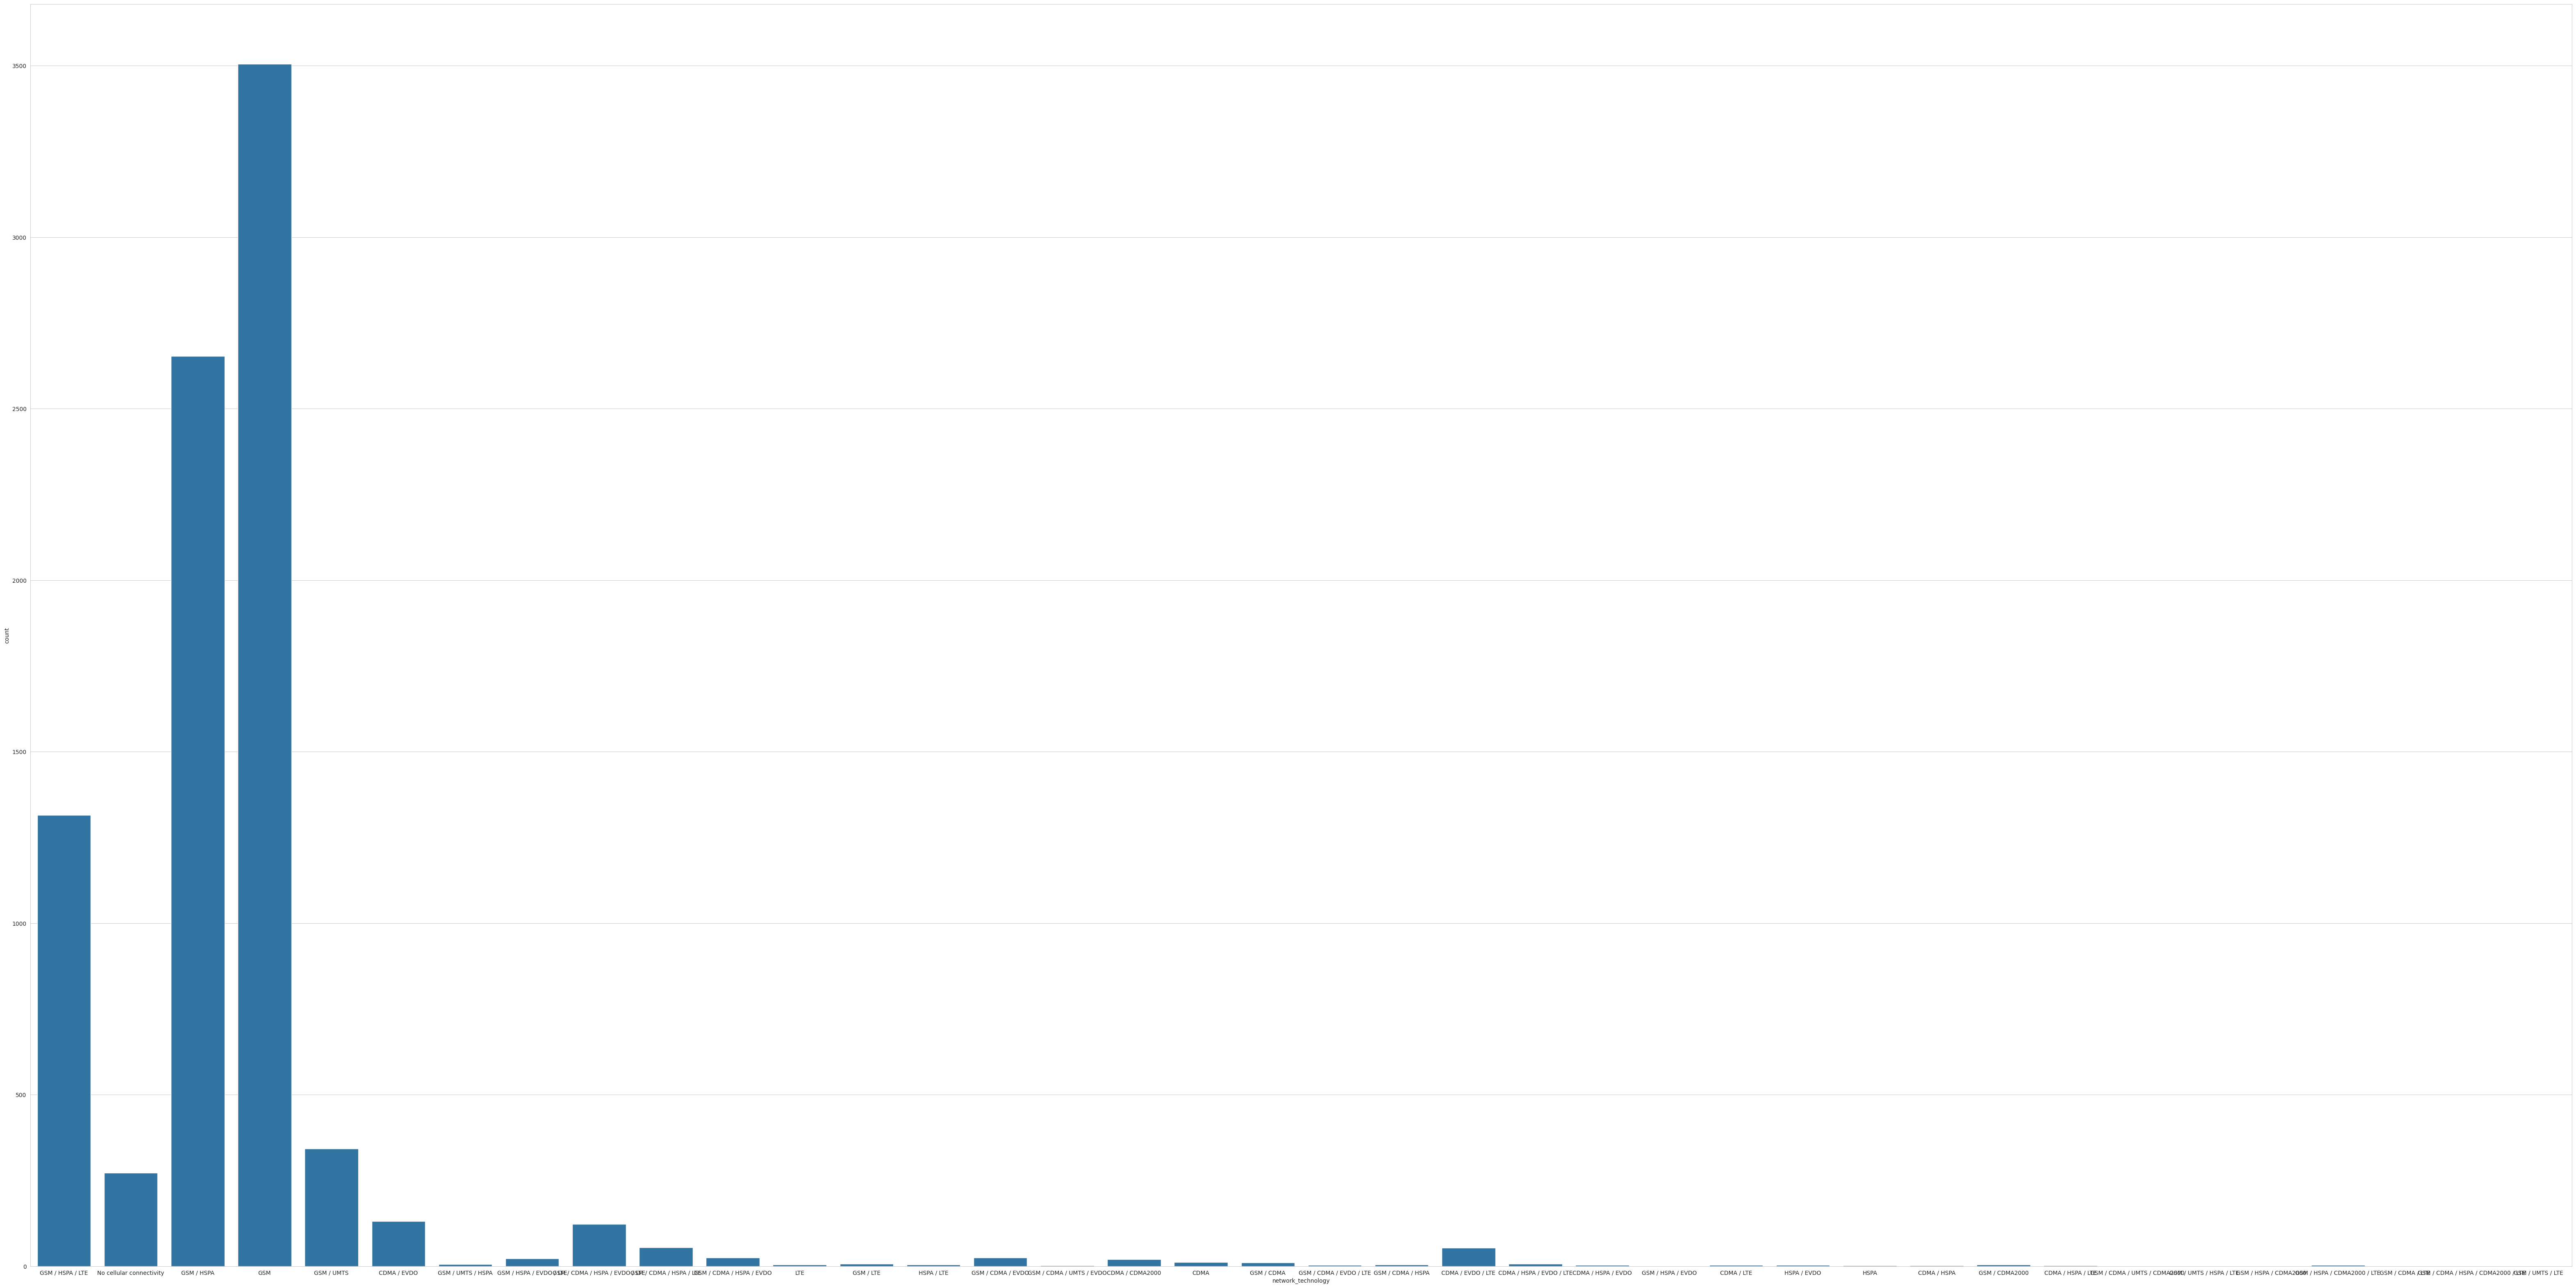

In [ ]:
#different network technology count.
plt.figure(figsize=(80,40))
sns.set_style('whitegrid')
sns.countplot(x='network_technology',data=df)

<Axes: xlabel='brand', ylabel='count'>

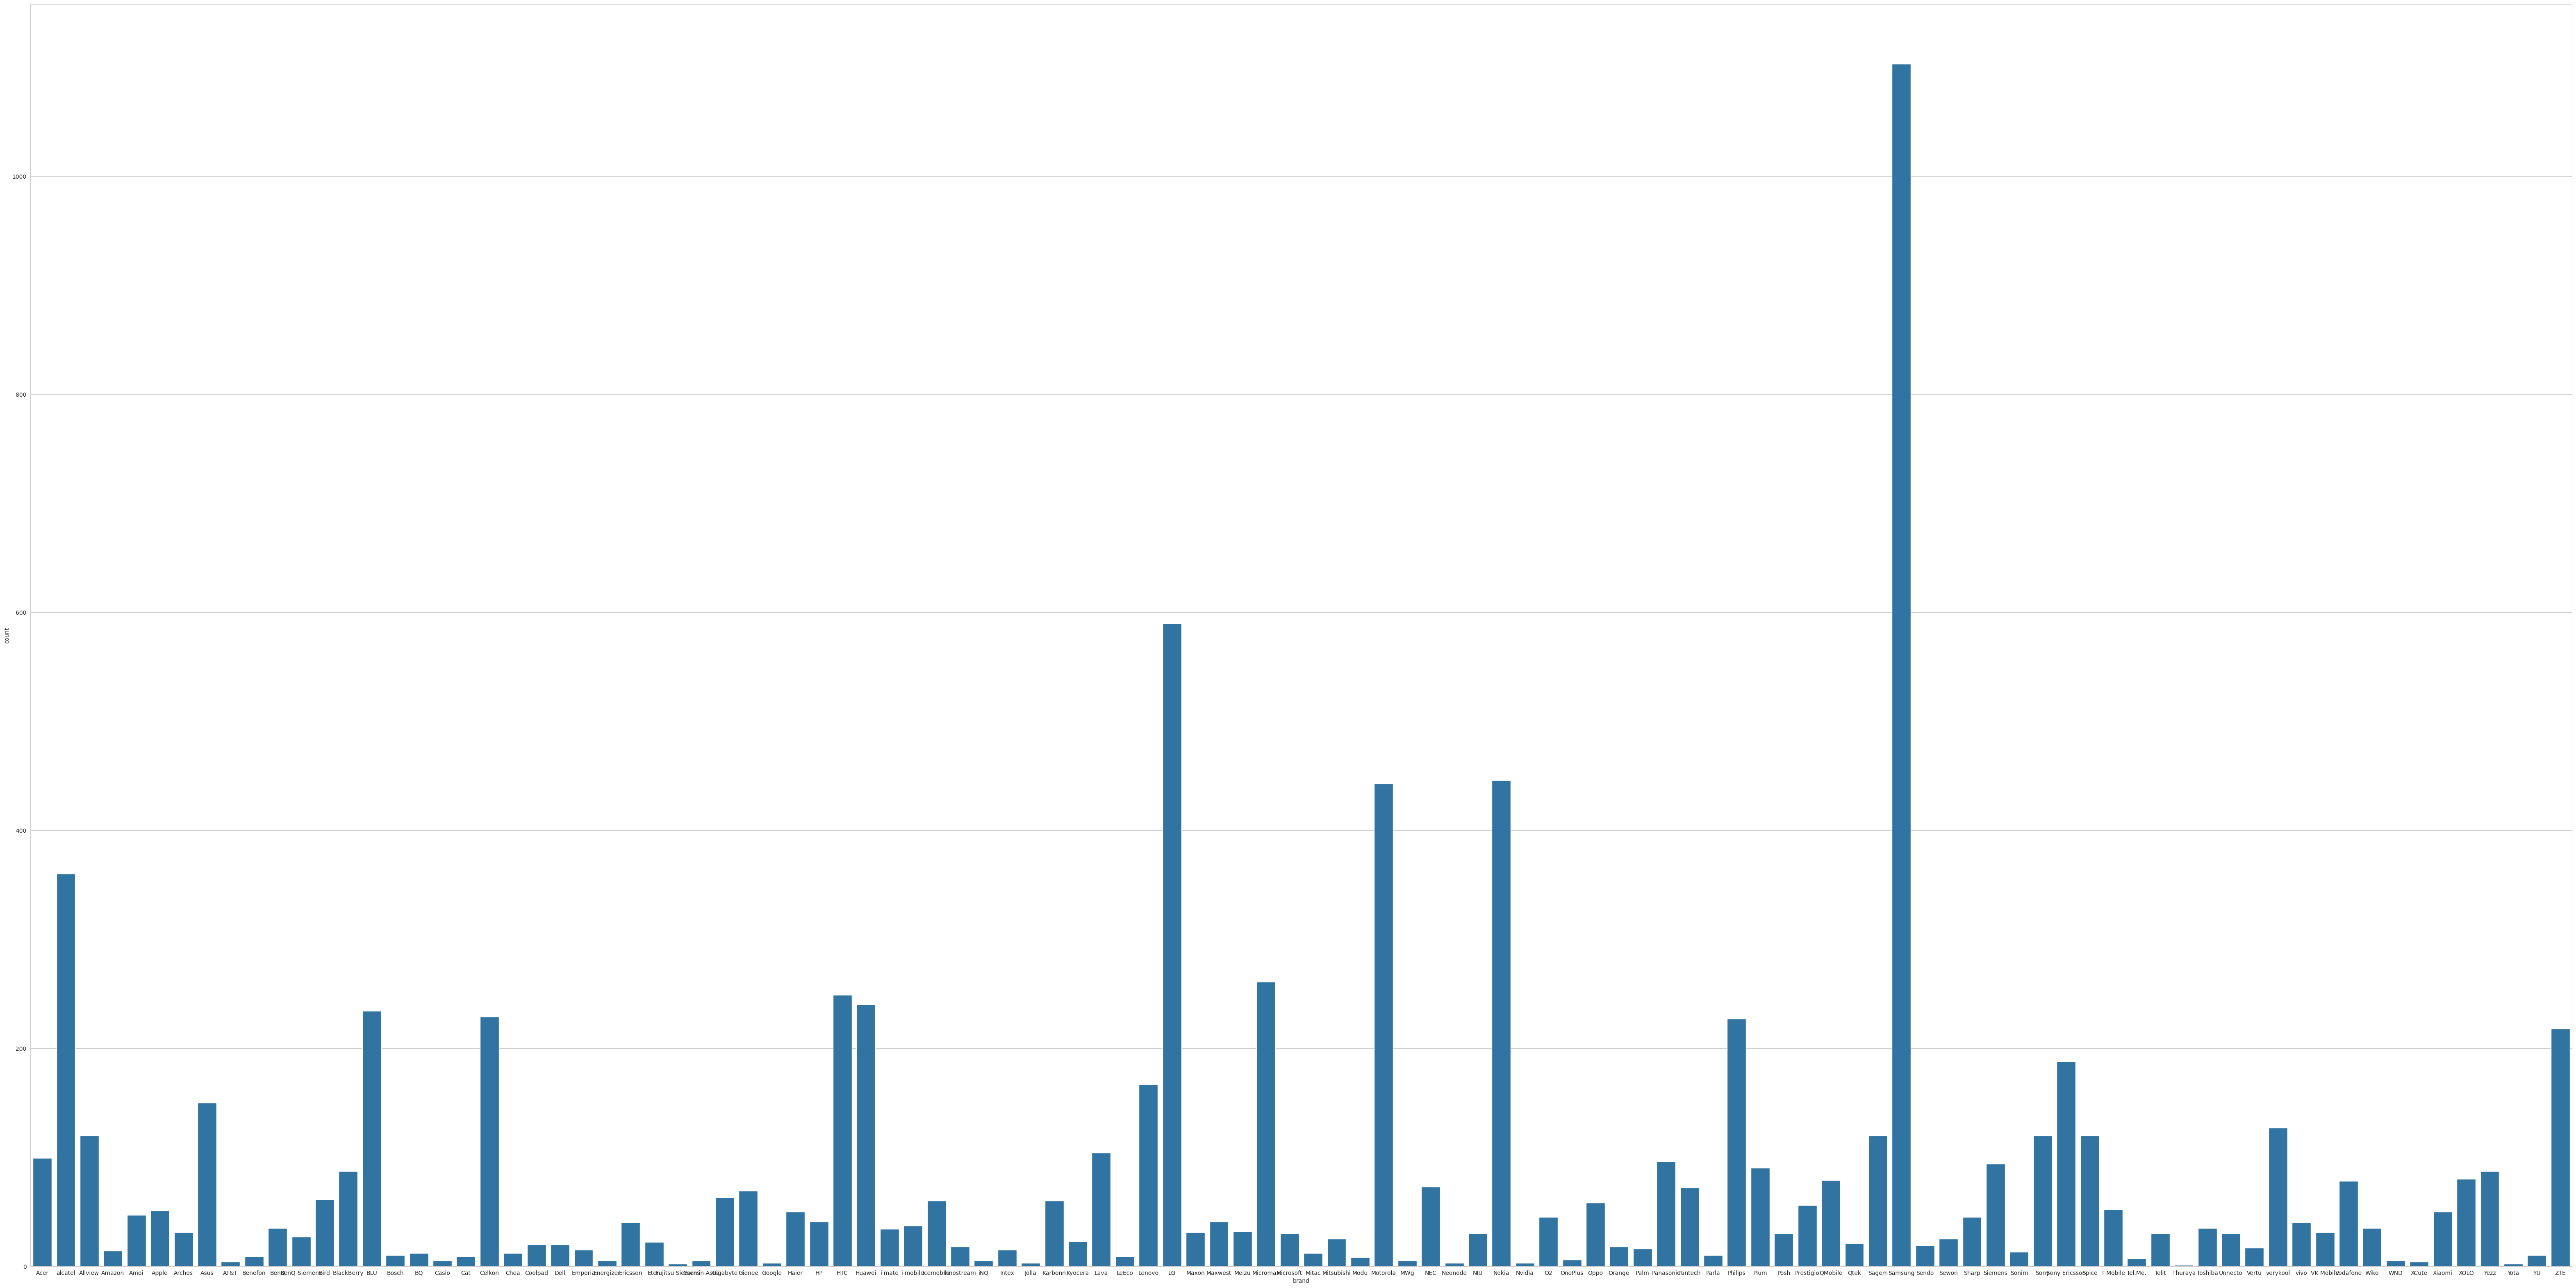

In [ ]:
#different brand count
plt.figure(figsize=(80,40))
sns.set_style('whitegrid')
sns.countplot(x='brand',data=df)

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
  df[col]=le.fit_transform(df[col])
df

,brand,model,network_technology,2G_bands,3G_bands,network_speed,GPRS,EDGE,announced,status,...,WLAN,bluetooth,GPS,NFC,radio,USB,battery,colors,approx_price_EUR,img_url
0,1,3397,27,101,226,104,45,43,649,112,...,8,39,38,50,2,53,238,221,20,241
1,1,3894,27,109,5,123,45,43,649,104,...,115,39,29,50,2,53,988,568,30,277
2,1,3893,27,109,5,26,45,43,649,104,...,161,95,29,50,2,53,673,568,9,278
3,1,3375,37,5,479,75,28,29,648,108,...,54,95,10,50,50,53,329,221,27,231
4,1,3878,27,43,471,123,45,43,633,105,...,129,46,29,50,2,53,987,405,27,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8623,101,2390,29,43,574,194,1,0,410,134,...,0,20,10,50,2,4,821,221,91,8214
8624,101,2351,29,43,574,194,1,0,410,134,...,0,20,10,50,2,4,524,533,91,8211
8625,101,2350,29,43,574,194,1,0,410,134,...,0,20,10,50,2,4,524,2515,91,8210
8626,101,2349,29,43,574,194,1,0,410,134,...,0,20,10,50,2,4,524,2515,91,8209


In [ ]:
x=df.drop(['approx_price_EUR'],axis=1)
y=df['approx_price_EUR']

In [ ]:
#feature selection using mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,y)
mutual_info

array([0.02542694, 0.0310658 , 0.16538301, 0.12619394, 0.07471546,
       0.12759043, 0.0564398 , 0.11603723, 0.09558092, 0.08118069,
       0.11194723, 0.10803982, 0.1302949 , 0.04634921, 0.04395449,
       0.11260459, 0.08652733, 0.10341878, 0.09456249, 0.06240778,
       0.07246902, 0.10810254, 0.12082135, 0.02581605, 0.08012164,
       0.07098419, 0.10593952, 0.18154376, 0.07748383, 0.03750998,
       0.0992915 , 0.0917768 , 0.00912908, 0.00321798])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)

GPS                   0.181544
network_technology    0.165383
weight_oz             0.130295
network_speed         0.127590
2G_bands              0.126194
secondary_camera      0.120821
EDGE                  0.116037
display_resolution    0.112605
dimentions            0.111947
primary_camera        0.108103
weight_g              0.108040
bluetooth             0.105940
OS                    0.103419
USB                   0.099291
announced             0.095581
CPU                   0.094562
battery               0.091777
display_size          0.086527
status                0.081181
audio_jack            0.080122
NFC                   0.077484
3G_bands              0.074715
internal_memory       0.072469
WLAN                  0.070984
memory_card           0.062408
GPRS                  0.056440
SIM                   0.046349
display_type          0.043954
radio                 0.037510
model                 0.031066
loud_speaker          0.025816
brand                 0.025427
colors  

<Axes: >

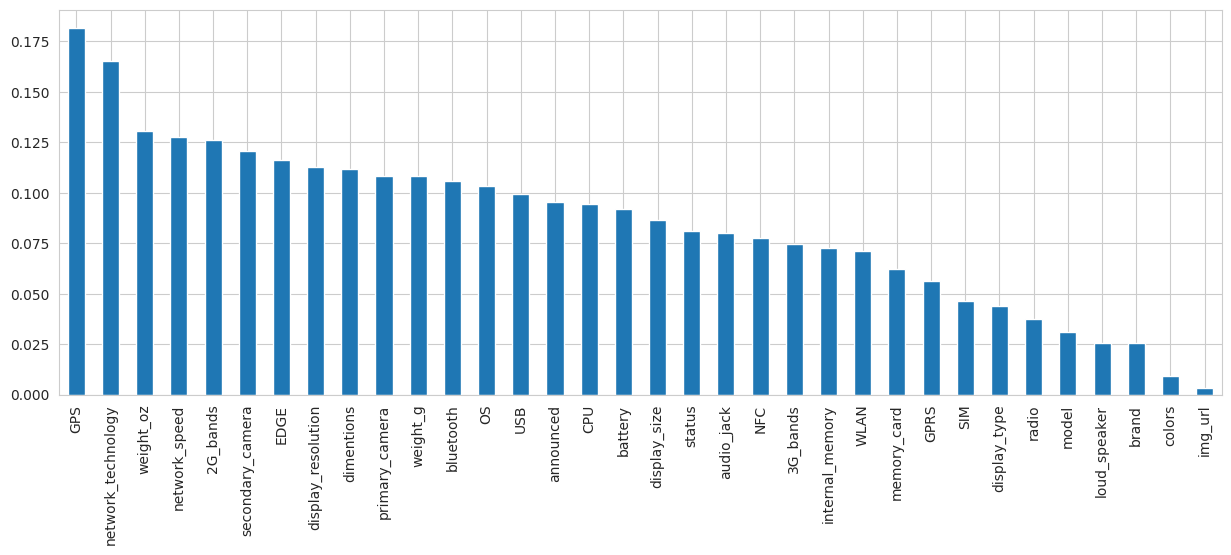

In [ ]:
#bar plot based on feature selection.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
#we are only taking the best columns
df1=df.drop(['colors','radio','img_url','approx_price_EUR'],axis=1)


In [ ]:
x1=df1.iloc[:,:]
y1=df['approx_price_EUR']

In [ ]:
y1

0       20
1       30
2        9
3       27
4       27
        ..
8623    91
8624    91
8625    91
8626    91
8627    91
Name: approx_price_EUR, Length: 8628, dtype: int64

In [ ]:
#splitting into training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)


In [ ]:
#Model creation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score
lmodel=LinearRegression()
dmodel=DecisionTreeRegressor()
rmodel=RandomForestRegressor()
knn=KNeighborsRegressor(n_neighbors=7)
model=[lmodel,dmodel,rmodel,knn]


In [ ]:
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("MAPE IS",mean_absolute_percentage_error(y_test,y_pred))
  print("SCORE IS",r2_score(y_test,y_pred))

MAPE IS 1.927440596569442
SCORE IS 0.18751311250001845
MAPE IS 1.509723366533667
SCORE IS -0.12713006815137118
MAPE IS 1.480289979404449
SCORE IS 0.4296816976567265
MAPE IS 1.748869174743234
SCORE IS 0.18277589206209166


In [ ]:
#taking the model which has the highest performance score.


In [ ]:
#Hyper_parameter tuning using GridSearchCV.
param={'n_estimators': [25, 50, 100, 150],'max_features':['sqrt','log2', None],'max_depth':[3, 6, 9],'max_leaf_nodes':[3, 6, 9]}
clf=GridSearchCV(RandomForestRegressor(),param,cv=3,n_jobs=-1)#cv-cross validation
clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [ ]:
#printing the best parameters for the selected model.
print(clf.best_params_)

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}


In [ ]:
#appliying the best parameters in the model.
rf=RandomForestRegressor(max_depth=9,max_features=None,max_leaf_nodes=9,n_estimators=25)
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)
y_pred1

array([65.68039332, 47.19051827, 64.93962613, ..., 70.74757663,
       51.62089012, 67.21771479])

In [ ]:
#New performance scores after performing hypertuning.
print("MAPE IS",mean_absolute_percentage_error(y_test,y_pred1))
print("R2 SCORE IS",r2_score(y_test,y_pred1))

MAPE IS 1.891666475360149
R2 SCORE IS 0.23904809271888106


In [ ]:
df1.info


<bound method DataFrame.info of       brand  model  network_technology  2G_bands  3G_bands  network_speed  \
0         1   3397                  27       101       226            104   
1         1   3894                  27       109         5            123   
2         1   3893                  27       109         5             26   
3         1   3375                  37         5       479             75   
4         1   3878                  27        43       471            123   
...     ...    ...                 ...       ...       ...            ...   
8623    101   2390                  29        43       574            194   
8624    101   2351                  29        43       574            194   
8625    101   2350                  29        43       574            194   
8626    101   2349                  29        43       574            194   
8627    101   1761                   9       149       479             75   

      GPRS  EDGE  announced  status  ...  p

In [ ]:
#predict the price based on users input.
pr=rf.predict([[101,2390,29,43,574,194,1,0,410,134,4238,333,285,62,77,2590,55,279,395,130,194,82,155,2,3,115,39,29,50,53,988]])
pr

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([46.58527807])

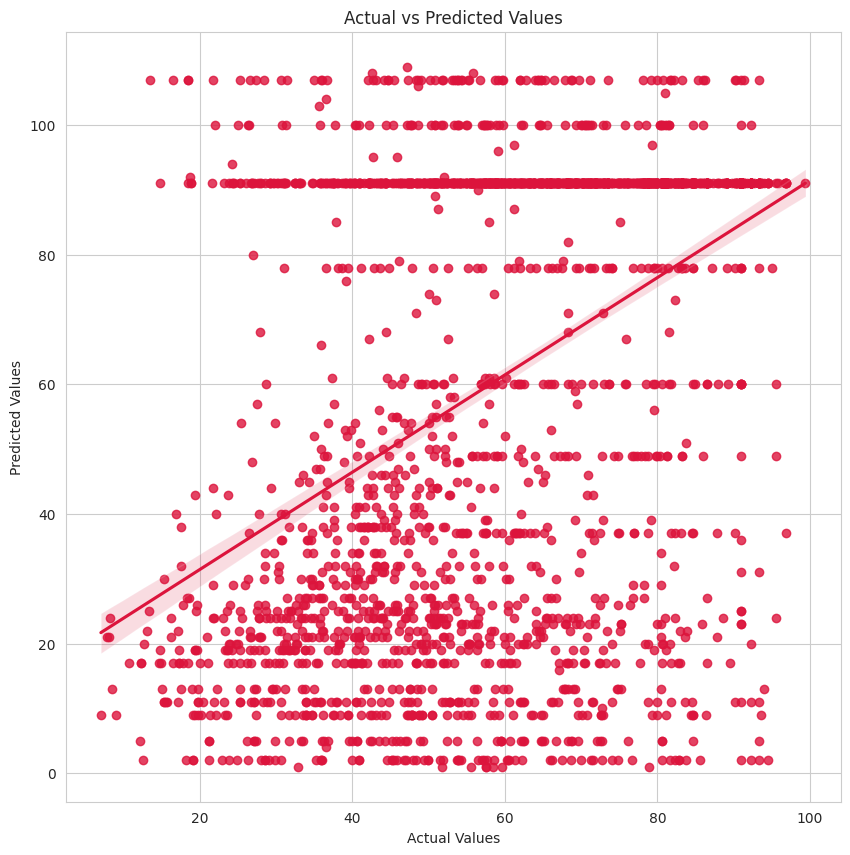

In [ ]:
#predicted vs actual
plt.figure(figsize=(10,10))
sns.regplot(x=y_pred,y=y_test,color='crimson',data=df1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
#Applying polynomial regression.
#Polynomial provides the best approximation of the relationship between the dependent and independent variable.
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x1)
x_poly

array([[1.00000000e+00, 1.00000000e+00, 3.39700000e+03, ...,
        6.68542000e+05, 3.00213200e+06, 1.34812720e+07],
       [1.00000000e+00, 1.00000000e+00, 3.89400000e+03, ...,
        2.77529200e+06, 5.17356320e+07, 9.64430272e+08],
       [1.00000000e+00, 1.00000000e+00, 3.89300000e+03, ...,
        1.89045700e+06, 2.40052370e+07, 3.04821217e+08],
       ...,
       [1.00000000e+00, 1.01000000e+02, 2.35000000e+03, ...,
        8.38400000e+03, 1.09830400e+06, 1.43877824e+08],
       [1.00000000e+00, 1.01000000e+02, 2.34900000e+03, ...,
        8.38400000e+03, 1.09830400e+06, 1.43877824e+08],
       [1.00000000e+00, 1.01000000e+02, 1.76100000e+03, ...,
        4.45824000e+05, 1.43778240e+07, 4.63684824e+08]])

In [ ]:
poly.fit(x_poly,y) #to correct the dimension
model1=LinearRegression()
model1.fit(x_poly,y1)
y_pred1=model1.predict(x_poly)
y_pred1

array([28.85409898, 44.36799616, 13.56540824, ..., 97.32896752,
       97.3293728 , 91.4173506 ])

In [ ]:
print("R2_score is",r2_score(y1,y_pred1))

R2_score is 0.8643698166765056


In [ ]:

a=lambda x,y:x+y
sum=a(5,3)
sum


8

In [ ]:
a=12345
print(str(a)[::-1])

54321
